# Example Portfolio Analysis


In [1]:
%load_ext autoreload
%autoreload 2

# !pip install nb_black
%load_ext nb_black

&lt;IPython.core.display.Javascript object&gt;

In [2]:
import sys
sys.path.append("..")

&lt;IPython.core.display.Javascript object&gt;

In [9]:
import pandas as pd
import ffn

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from ppt.portfolio_value import Portfolio
from utils import print_properties

&lt;IPython.core.display.Javascript object&gt;

<a id='ld'></a>
## Load Data

Initialising the `Portfolio` object will load the input data, download the relevant stock prices and calculate some initial stats on the portfolio.

The default location for the input file is `../data/raw/purchase_info.csv` however, you can specify your own location using the optional `input_data_source` argument.

In [8]:
#initiate Portfolio object
pf = Portfolio()

#add a SNP500 benchmark
pf.add_benchmark('^GSPC')

#print available properties
print_properties(pf)

add_benchmark
benchmark
cash
daily_stock_prices_local_currency
daily_stock_prices_usd
datetime_index
input_data_source
portfolio_value_usd
positions
profit
start_date
stock_metadata
stocks
tickers


&lt;IPython.core.display.Javascript object&gt;

## High level analysis

Now you have access to all the raw underlying stock price data and the daily running totals of the overall portfolio and each individual position. We can quickly plot the value of the portfolio over time and the running profit (portfolio value minus cash injections).


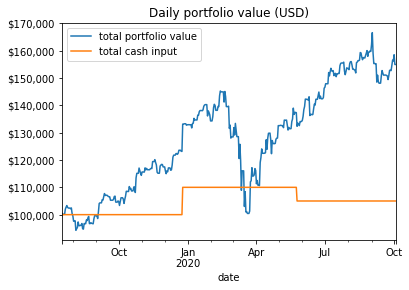

&lt;IPython.core.display.Javascript object&gt;

In [18]:
#show the daily portfolio value including cash injections
pf.portfolio_value_usd.plot(label='total portfolio value')
pf.cash.cash_flows['external_cashflows'].plot(label='total cash input')
plt.title("Daily portfolio value (USD)")
plt.gca().get_yaxis().set_major_formatter(
    mpl.ticker.StrMethodFormatter('${x:,.0f}')
)
plt.legend()
plt.show()

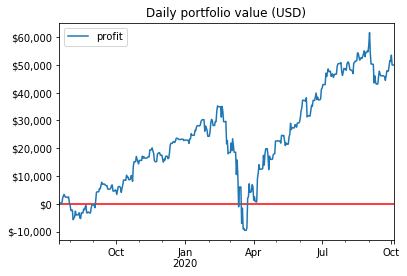

&lt;IPython.core.display.Javascript object&gt;

In [19]:
# show the running profit (portfolio value minus cash injections)
pf.profit.plot(label='profit')
plt.title("Daily portfolio value (USD)")
plt.gca().get_yaxis().set_major_formatter(
    mpl.ticker.StrMethodFormatter('${x:,.0f}')
)
plt.hlines(y=0,xmin=pf.datetime_index[0],xmax=pf.datetime_index[-1],color='red')
plt.legend()
plt.show()

In [20]:
pf.stocks.daily_stocks_value_usd

yahoo_ticker,INTC,AMAT,MKSI,SNPS,SOXX,NVDA,8035.T,BESI.AS
2019-07-17,8631.497955,12161.203369,9274.424744,9231.000000,15077.042770,0.000000,0.000000,0.000000
2019-07-18,8727.615967,12674.278442,9550.101929,9250.719543,15295.250702,6616.607437,0.000000,0.000000
2019-07-19,8785.288696,12579.557724,9411.073608,9179.320374,15277.559280,6548.956100,0.000000,0.000000
2019-07-20,8785.288696,12579.557724,9411.073608,9179.320374,15277.559280,6548.956100,0.000000,0.000000
2019-07-21,8785.288696,12579.557724,9411.073608,9179.320374,15277.559280,6548.956100,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2020-09-30,9320.399780,15932.600204,13107.600403,14550.639709,22845.748901,23813.678711,25917.250981,18020.403741
2020-10-01,9403.200302,16254.200409,13377.600403,14762.119751,23334.750366,23961.520752,26036.781024,18651.210208
2020-10-02,9181.799698,15600.279755,13015.199890,14419.400208,22634.999084,22989.559570,26117.316919,18256.578509
2020-10-03,9181.799698,15600.279755,13015.199890,14419.400208,22634.999084,22989.559570,26117.316919,18256.578509


&lt;IPython.core.display.Javascript object&gt;